# **Covid-19 Data Analysis**

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Dataset**

In [3]:
confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("time_series_covid19_recovered_global.csv")

In [20]:
confirmed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,2,0,0


In [19]:
confirmed.describe()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
count,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
unique,11,15,19,8,3,2,17,13,34,26,...,2,9,18,30,9,8,8,24,3,3
top,0,0,0,0,0,0,0,0,15,0,...,0,0,0,9,0,0,0,16,0,0
freq,33,47,34,40,58,51,41,39,14,34,...,59,41,7,12,52,53,52,23,56,58


**Drop unnecessary columns and group by Country**

In [4]:
def preprocess(df):
    df = df.drop(['Lat', 'Long'], axis=1)
    df = df.groupby('Country/Region').sum()
    return df

confirmed = preprocess(confirmed)
deaths = preprocess(deaths)
recovered = preprocess(recovered)

**Transpose to have dates as index**

In [5]:
confirmed = confirmed.T
deaths = deaths.T
recovered = recovered.T

**Convert index to datetime**

In [7]:
confirmed = confirmed.iloc[1:]
deaths = deaths.iloc[1:]
recovered = recovered.iloc[1:]

confirmed.index = pd.to_datetime(confirmed.index)
deaths.index = pd.to_datetime(deaths.index)
recovered.index = pd.to_datetime(recovered.index)

/tmp/ipython-input-7-1033718031.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed.index = pd.to_datetime(confirmed.index)
/tmp/ipython-input-7-1033718031.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths.index = pd.to_datetime(deaths.index)
/tmp/ipython-input-7-1033718031.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  recovered.index = pd.to_datetime(recovered.index)


# **Line Plot of Cumulative Cases for Top Affected Countries**

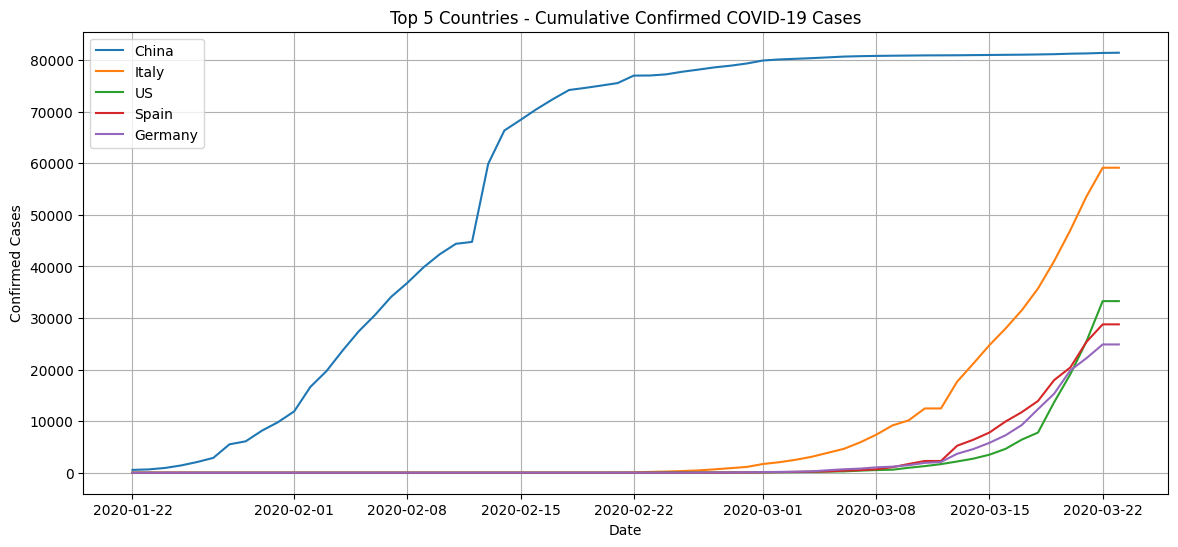

In [8]:
top_countries = confirmed.iloc[-1].sort_values(ascending=False).head(5).index

plt.figure(figsize=(14, 6))
for country in top_countries:
    plt.plot(confirmed.index, confirmed[country], label=country)

plt.title("Top 5 Countries - Cumulative Confirmed COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.grid(True)
plt.show()


# **Area Chart - Global Cumulative Trends**

/tmp/ipython-input-13-2611384749.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  global_confirmed_daily = global_confirmed.diff().fillna(0)
/tmp/ipython-input-13-2611384749.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  global_deaths_daily = global_deaths.diff().fillna(0)
/tmp/ipython-input-13-2611384749.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_sil

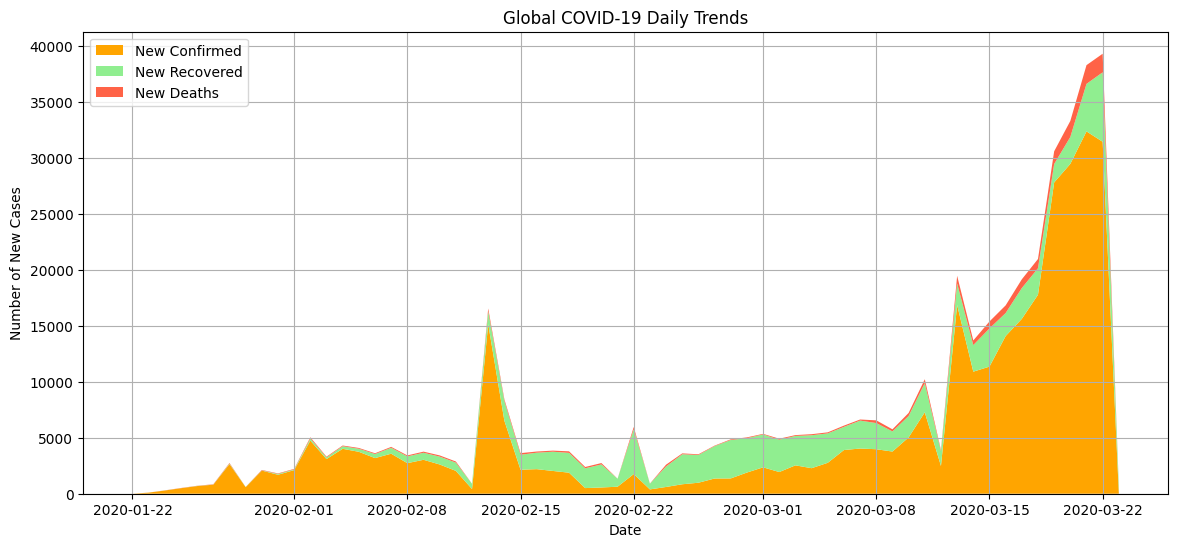

In [13]:
global_confirmed_daily = global_confirmed.diff().fillna(0)
global_deaths_daily = global_deaths.diff().fillna(0)
global_recovered_daily = global_recovered.diff().fillna(0)

plt.figure(figsize=(14, 6))
plt.stackplot(global_confirmed_daily.index,
              global_confirmed_daily,
              global_recovered_daily,
              global_deaths_daily,
              labels=['New Confirmed', 'New Recovered', 'New Deaths'],
              colors=['#FFA500', '#90EE90', '#FF6347'])

plt.title('Global COVID-19 Daily Trends')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# **Heatmap of Cases Over Time (Example: Confirmed Cases)**

/tmp/ipython-input-17-1520118916.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data_daily = confirmed[selected_countries].diff().fillna(0).T


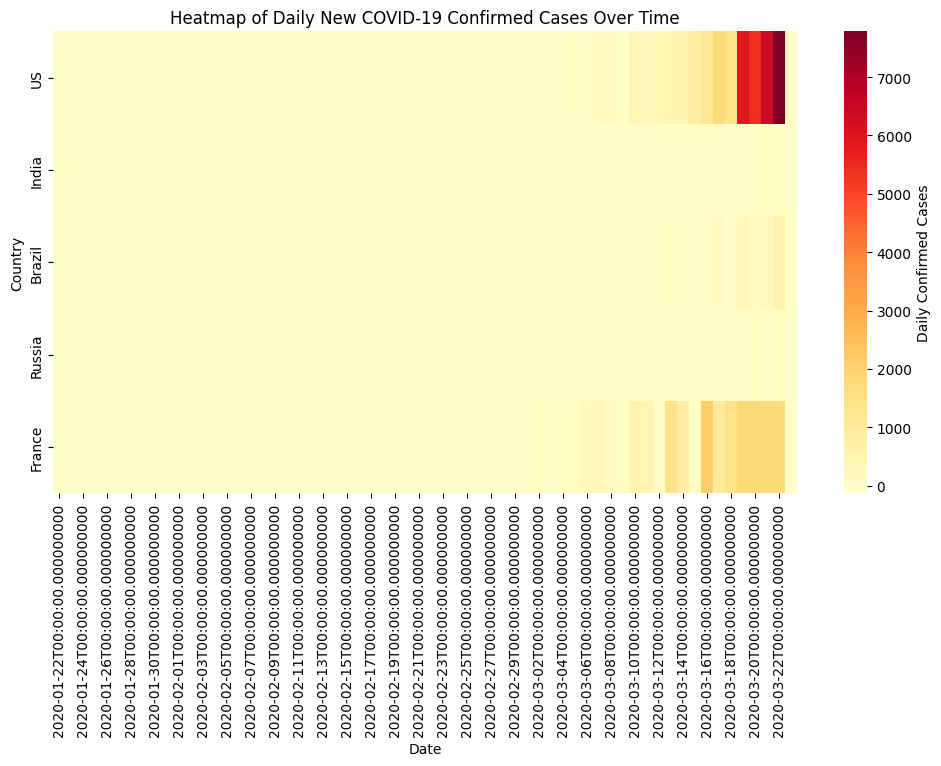

In [17]:
selected_countries = ['US', 'India', 'Brazil', 'Russia', 'France']
heatmap_data_daily = confirmed[selected_countries].diff().fillna(0).T

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_daily, cmap="YlOrRd", cbar_kws={'label': 'Daily Confirmed Cases'})
plt.title("Heatmap of Daily New COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Country")
plt.show()